In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
# zip object packs each pair of lats and lngs of same index into a tuple
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# create list to hold cities
cities = []
# identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique then add to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
len(cities)

606

In [5]:
import requests
requests.__version__

'2.25.1'

In [6]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [7]:
# starting url for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | clarence town
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | lyuban
Processing Record 17 of Set 1 | parelhas
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | georgetown
Proces

Processing Record 38 of Set 4 | camargo
Processing Record 39 of Set 4 | san marcos
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | kendari
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | luganville
Processing Record 45 of Set 4 | lephepe
City not found. Skipping...
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | port moresby
Processing Record 50 of Set 4 | craig
Processing Record 1 of Set 5 | jacareacanga
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | kirovskaya
Processing Record 4 of Set 5 | boa vista
Processing Record 5 of Set 5 | sept-iles
Processing Record 6 of Set 5 | beruni
City not found. Skipping...
Processing Record 7 of Set 5 | manaure
Processing Record 8 of Set 5 | west plains
Processing Record 9 of Set 5 | mbandaka
Processing Record 10 of Set 5 

Processing Record 27 of Set 8 | mehran
Processing Record 28 of Set 8 | richards bay
Processing Record 29 of Set 8 | dwarka
Processing Record 30 of Set 8 | cockburn town
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | saint-augustin
Processing Record 33 of Set 8 | mandapam
Processing Record 34 of Set 8 | kingseat
Processing Record 35 of Set 8 | tamiahua
Processing Record 36 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 8 | abha
Processing Record 38 of Set 8 | winnipeg
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | agar
Processing Record 41 of Set 8 | tamandare
Processing Record 42 of Set 8 | saleaula
City not found. Skipping...
Processing Record 43 of Set 8 | grao mogol
Processing Record 44 of Set 8 | parati
Processing Record 45 of Set 8 | pemba
Processing Record 46 of Set 8 | tigzirt
Processing Record 47 of Set 8 | mumford
Processing Record 48 of Set 8 | mnogovershinnyy
Processing Record 49 of Set 8 | col

Processing Record 14 of Set 12 | kenai
Processing Record 15 of Set 12 | kautokeino
Processing Record 16 of Set 12 | pacifica
Processing Record 17 of Set 12 | chlorakas
Processing Record 18 of Set 12 | grand centre
City not found. Skipping...
Processing Record 19 of Set 12 | arlit
Processing Record 20 of Set 12 | galesong
Processing Record 21 of Set 12 | tukrah
Processing Record 22 of Set 12 | lerwick
Processing Record 23 of Set 12 | jalingo
Processing Record 24 of Set 12 | nabire
Processing Record 25 of Set 12 | jalu
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | tazmalt
Processing Record 29 of Set 12 | santa cruz
Processing Record 30 of Set 12 | road town
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | billings
Processing Record 33 of Set 12 | haines junction
Processing Record 34 of Set 12 | ilo
Processing Record 35 of Set 12 | maralal
Processing Record 36 of Set 12 | muisne
P

In [9]:
# convert array of dicts to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,58.28,76,100,8.48,ZA,2021-12-04 02:45:38
1,Saldanha,-33.0117,17.9442,60.85,80,95,13.85,ZA,2021-12-04 02:45:38
2,Dunedin,-45.8742,170.5036,63.19,86,100,6.46,NZ,2021-12-04 02:42:17
3,Nikolskoye,59.7035,30.7861,25.02,96,100,4.74,RU,2021-12-04 02:45:38
4,Rikitea,-23.1203,-134.9692,76.73,73,61,15.64,PF,2021-12-04 02:45:39
5,Klaksvik,62.2266,-6.5890,34.72,71,95,7.96,FO,2021-12-04 02:45:39
6,Kaitangata,-46.2817,169.8464,60.33,96,100,5.39,NZ,2021-12-04 02:45:39
7,Lebu,-37.6167,-73.6500,52.43,89,5,18.95,CL,2021-12-04 02:45:38
8,Clarence Town,-32.5833,151.7833,72.81,70,100,5.93,AU,2021-12-04 02:45:40
9,Hermanus,-34.4187,19.2345,61.90,78,78,13.02,ZA,2021-12-04 02:45:40


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-12-04 02:45:38,-34.5322,20.0403,58.28,76,100,8.48
1,Saldanha,ZA,2021-12-04 02:45:38,-33.0117,17.9442,60.85,80,95,13.85
2,Dunedin,NZ,2021-12-04 02:42:17,-45.8742,170.5036,63.19,86,100,6.46
3,Nikolskoye,RU,2021-12-04 02:45:38,59.7035,30.7861,25.02,96,100,4.74
4,Rikitea,PF,2021-12-04 02:45:39,-23.1203,-134.9692,76.73,73,61,15.64
5,Klaksvik,FO,2021-12-04 02:45:39,62.2266,-6.5890,34.72,71,95,7.96
6,Kaitangata,NZ,2021-12-04 02:45:39,-46.2817,169.8464,60.33,96,100,5.39
7,Lebu,CL,2021-12-04 02:45:38,-37.6167,-73.6500,52.43,89,5,18.95
8,Clarence Town,AU,2021-12-04 02:45:40,-32.5833,151.7833,72.81,70,100,5.93
9,Hermanus,ZA,2021-12-04 02:45:40,-34.4187,19.2345,61.90,78,78,13.02


In [11]:
# create output file (CSV)
output_data_file = "weather_data/cities.csv"

# export city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# get data for plotting city latitude vs max temperatures 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

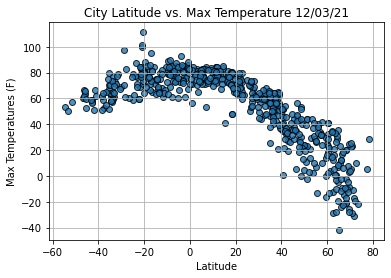

In [13]:
# import time
import time

# build scatter plot for latitude vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (F)')
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()